<a href="https://colab.research.google.com/github/JYOTIACHARYA1/Final-Project/blob/main/My_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.

# Variables in the Dataset :

● age (numeric)
● job : type of job
● marital : marital status
● educational_qual : education status
● call_type : contact communication type
● day: last contact day of the month (numeric)
● mon: last contact month of year
● dur: last contact duration, in seconds (numeric)
● num_calls: number of contacts performed during this
campaign and for this client
● prev_outcome: outcome of the previous marketing
campaign (categorical:
"unknown","other","failure","success")
Output variable (desired target):
● y - has the client subscribed to the insurance?

# Importing dependencies



In [ ]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('Customer Conversion Prediction.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:

print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 45211 rows and 11 columns.


Checking and Handling Missing Values

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# cross  checking  for  null  values
pd.DataFrame(df.isnull().sum()).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64
0,7,4


In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['age', 'day', 'dur', 'num_calls']

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

[]

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

## Data Type Correction

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df['job'] = df['job'].astype(object)
df['marital'] = df['marital'].astype(object)
df['education_qual'] = df['education_qual'].astype(object)
df['prev_outcome'] = df['prev_outcome'].astype(object)





In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

Categorical Data

In [ ]:

for i in object_data_cols:  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "mon" is divided into "12" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.

In [ ]:
# for column "job"
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# for column "marital"
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
# for column "education_qual"
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
# for column "call_type"
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
# for column "mon"
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
# for column "prev_outcome"
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
# for column "y"
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

Data Visualization.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

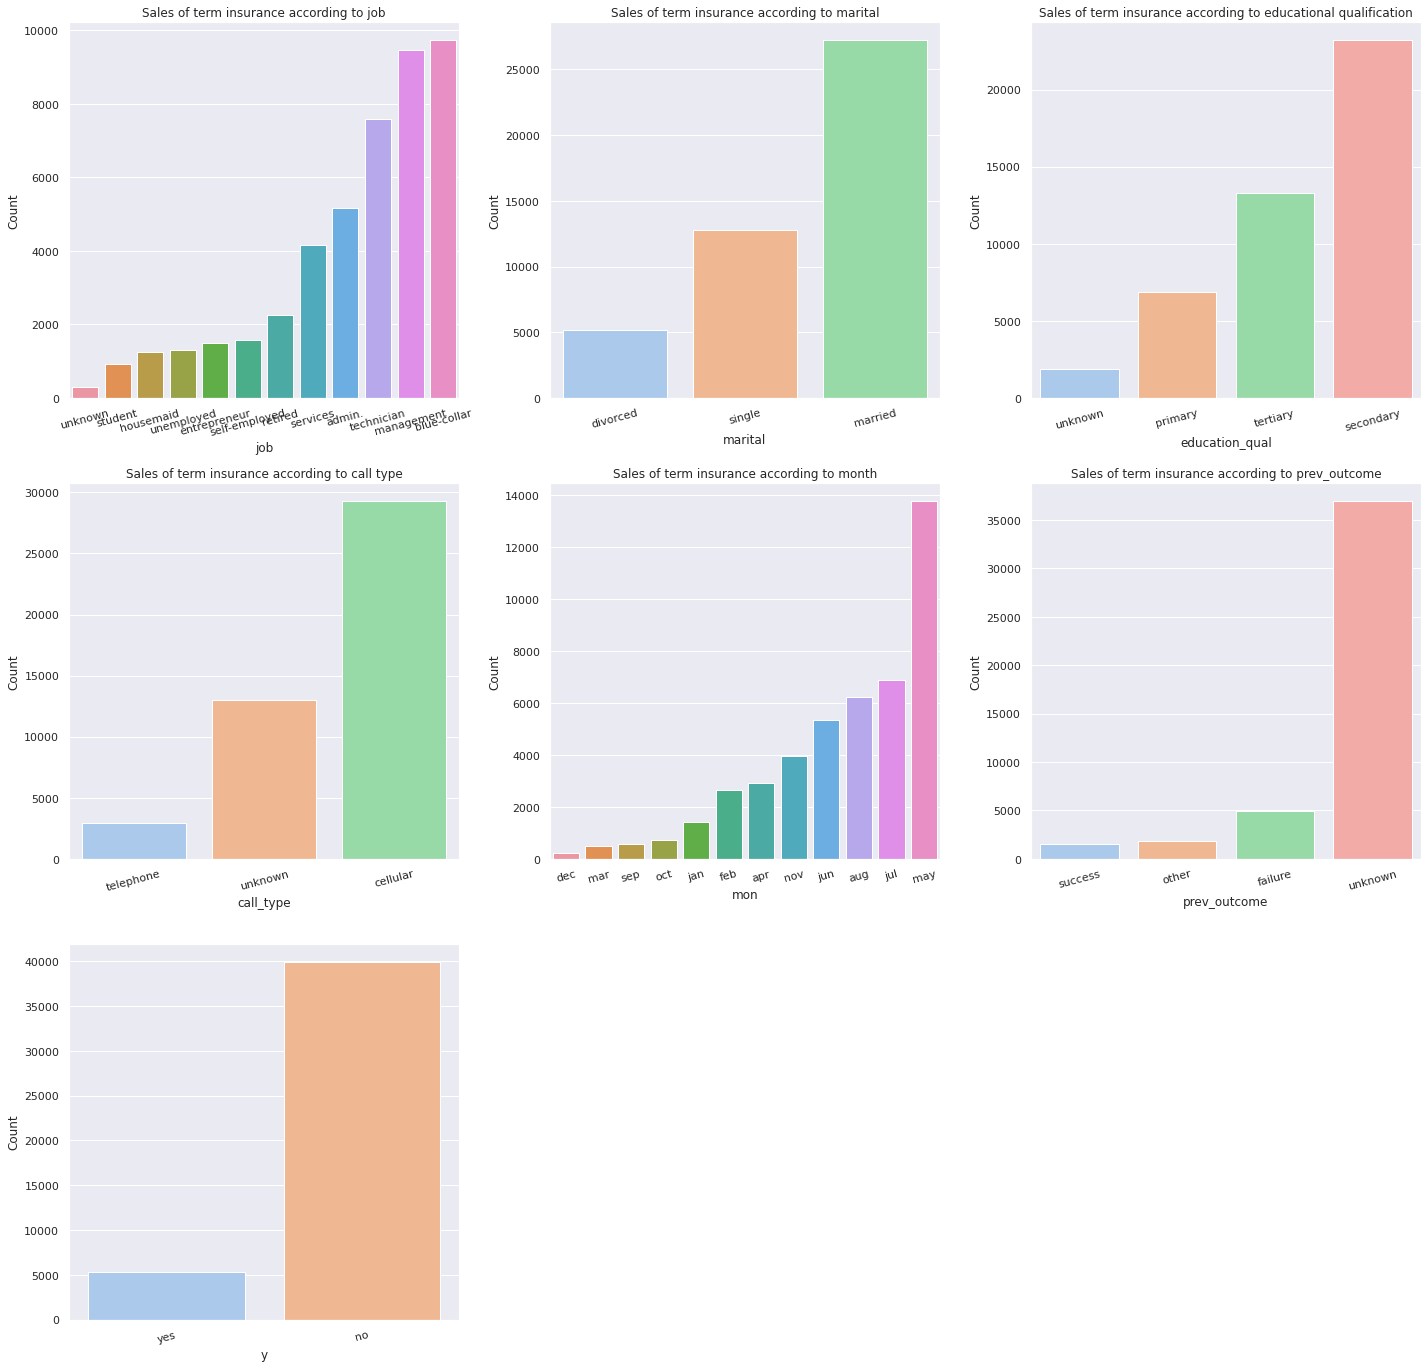

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('job')
plt.ylabel('Count')
plt.title('Sales of term insurance according to job')

plt.subplot(432)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Count')
plt.title('Sales of term insurance according to marital')

plt.subplot(433)
sns.countplot(df['education_qual'],order=df['education_qual'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Count')
plt.title('Sales of term insurance according to educational qualification')

plt.subplot(434)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Count')
plt.title('Sales of term insurance according to call type')

plt.subplot(435)
sns.countplot(df['mon'],order=df['mon'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Count')
plt.title('Sales of term insurance according to month')

plt.subplot(436)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Count')
plt.title('Sales of term insurance according to prev_outcome')


plt.subplot(437)
sns.countplot(df['y'],order=df['y'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('y')
plt.ylabel('Count')

plt.tight_layout()




Plotting barplots for Categorical Columns vs Mean Call Duration

In [ ]:
#orders for all the barplots in ascending order
job_order = df.groupby('job')['dur'].mean().reset_index().sort_values('dur')['job']
marital_order = df.groupby('marital')['dur'].mean().reset_index().sort_values('dur')['marital']
education_qual_order = df.groupby('education_qual')['dur'].mean().reset_index().sort_values('dur')['education_qual']
call_type_order = df.groupby('call_type')['dur'].mean().reset_index().sort_values('dur')['call_type']
mon_order = df.groupby('mon')['dur'].mean().reset_index().sort_values('dur')['mon']
prev_outcome_order = df.groupby('prev_outcome')['dur'].mean().reset_index().sort_values('dur')['prev_outcome']
y_order = df.groupby('y')['dur'].mean().reset_index().sort_values('dur')['y']







/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

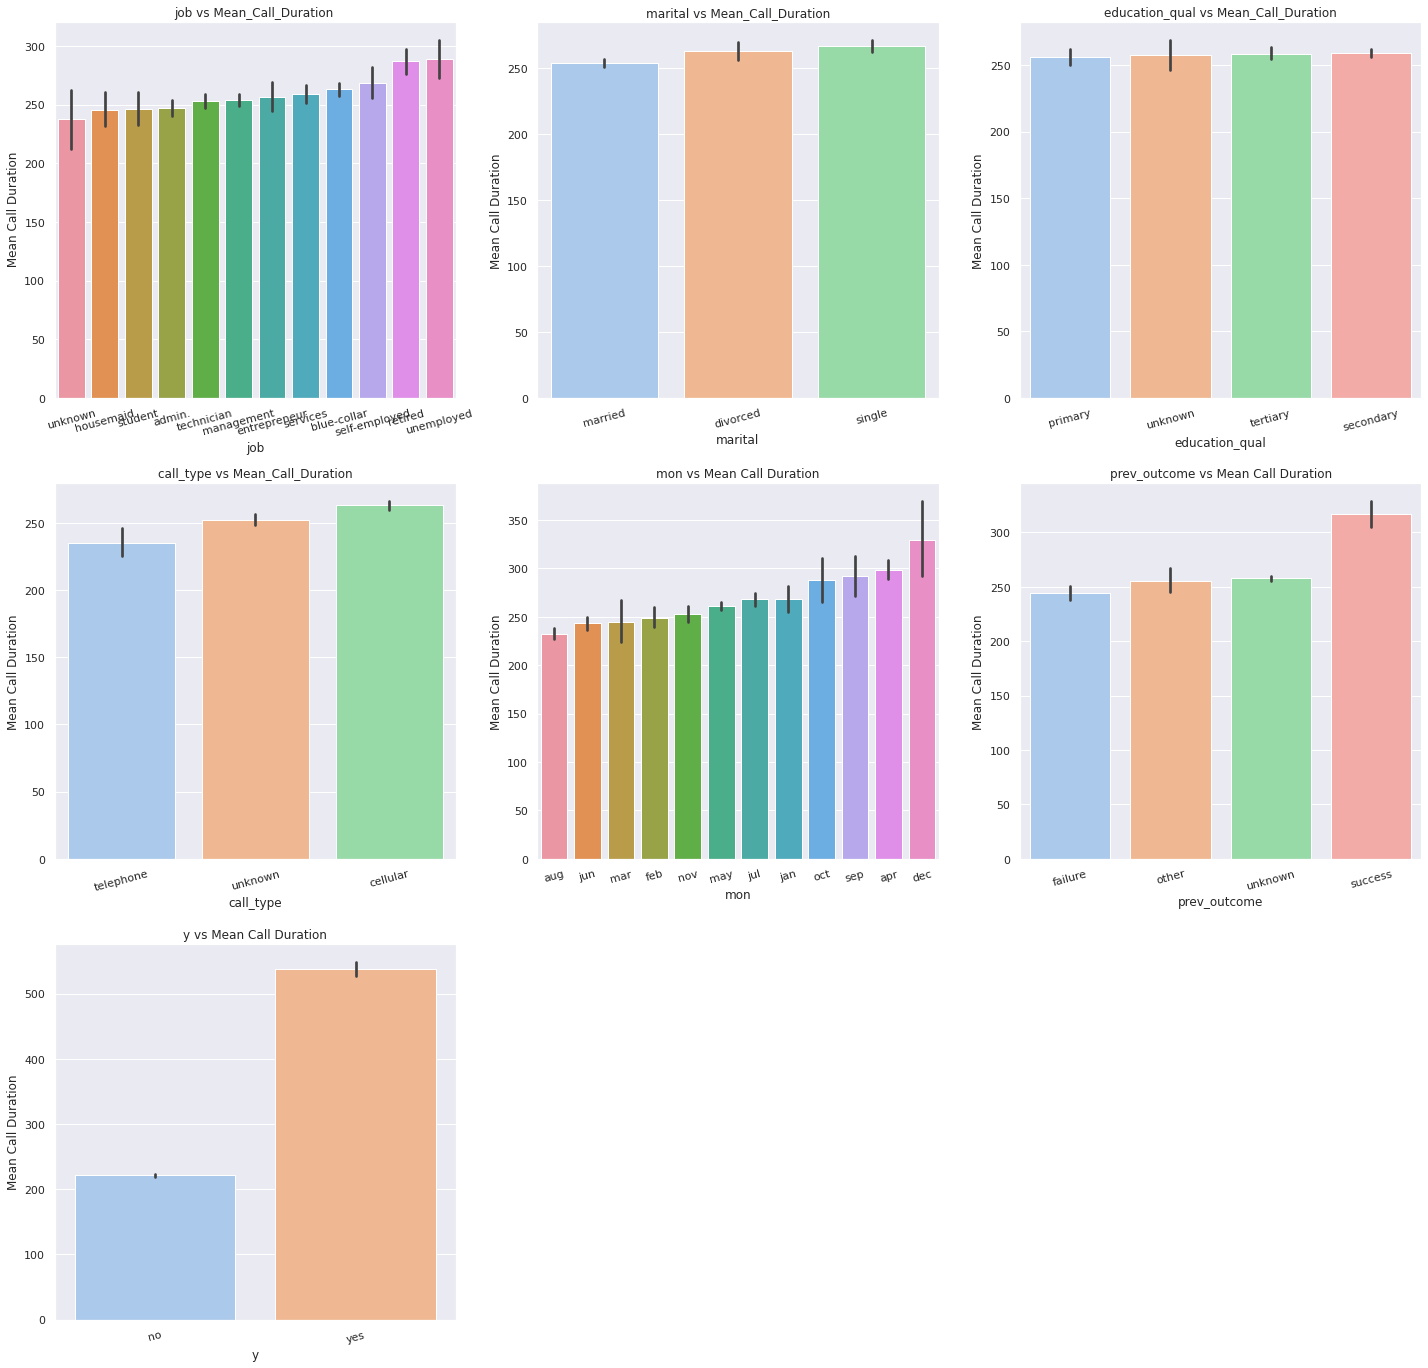

In [ ]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['job'],df['dur'],order=job_order)
plt.xticks(rotation=15)
plt.xlabel('job')
plt.ylabel(' Mean Call Duration')
plt.title('job vs Mean_Call_Duration ')

plt.subplot(432)
sns.barplot(df['marital'],df['dur'],order=marital_order)
plt.xticks(rotation=15)
plt.xlabel('marital')
plt.ylabel('Mean Call Duration')
plt.title('marital vs Mean_Call_Duration')

plt.subplot(433)
sns.barplot(df['education_qual'],df['dur'],order=education_qual_order)
plt.xticks(rotation=15)
plt.xlabel('education_qual')
plt.ylabel('Mean Call Duration')
plt.title('education_qual vs Mean_Call_Duration')

plt.subplot(434)
sns.barplot(df['call_type'],df['dur'],order=call_type_order)
plt.xticks(rotation=15)
plt.xlabel('call_type')
plt.ylabel('Mean Call Duration')
plt.title('call_type vs Mean_Call_Duration')

plt.subplot(435)
sns.barplot(df['mon'],df['dur'],order=mon_order)
plt.xticks(rotation=15)
plt.xlabel('mon')
plt.ylabel('Mean Call Duration')
plt.title('mon vs Mean Call Duration')

plt.subplot(436)
sns.barplot(df['prev_outcome'],df['dur'],order=prev_outcome_order)
plt.xticks(rotation=15)
plt.xlabel('prev_outcome')
plt.ylabel('Mean Call Duration')
plt.title('prev_outcome vs Mean Call Duration')

plt.subplot(437)
sns.barplot(df['y'],df['dur'],order=y_order)
plt.xticks(rotation=15)
plt.xlabel('y')
plt.ylabel('Mean Call Duration')
plt.title('y vs Mean Call Duration')

plt.tight_layout()

Plotting line plots for integer column vs  dur column.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'NUM CALLS VS DUR')

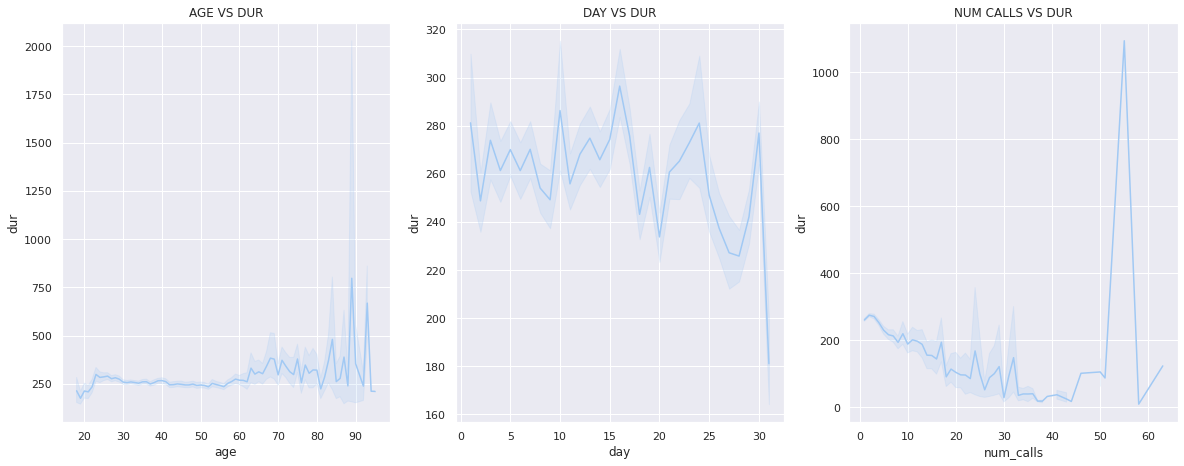

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['age'],df['dur'])
plt.title('AGE VS DUR')

plt.subplot(332)
sns.lineplot(df['day'],df['dur'])
plt.title('DAY VS DUR')

plt.subplot(333)
sns.lineplot(df['num_calls'],df['dur'])
plt.title('NUM CALLS VS DUR')

Plotting scatter plots for masked data vs the duratuion column

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'age vs duration')

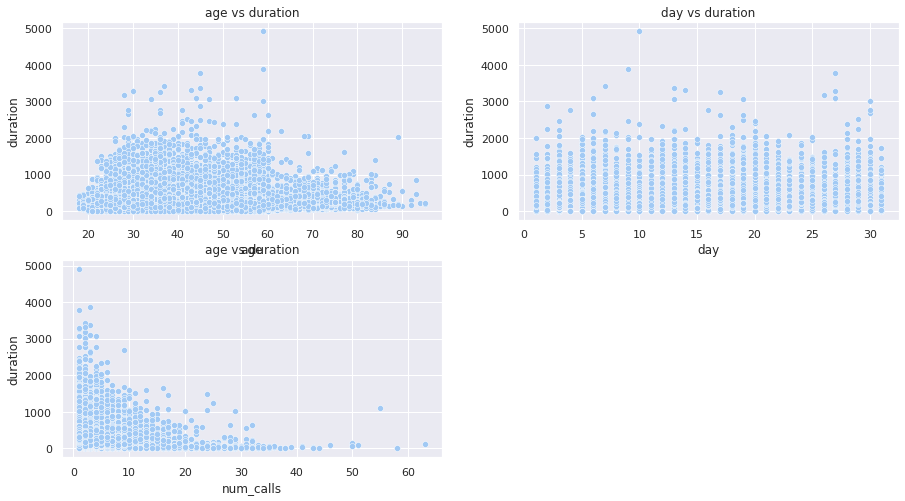

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(df['age'],df['dur'])
plt.xlabel('age')
plt.ylabel('duration')
plt.title('age vs duration')


plt.subplot(222)
sns.scatterplot(df['day'],df['dur'])
plt.xlabel('day')
plt.ylabel('duration')
plt.title('day vs duration')

plt.subplot(223)
sns.scatterplot(df['num_calls'],df['dur'])
plt.xlabel('num_calls')
plt.ylabel('duration')
plt.title('age vs duration')

## Encoding Categorical Variables

In [ ]:
df['job'] = df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10,'unknown':11})
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})
df['education_qual'] = df['education_qual'].map({'secondary':0,'tertiary':1,'primary':2,'unknown':3})
df = pd.get_dummies(df, columns = ['call_type'])
df['mon'] = df['mon'].map({'may':0,'jul':1,'aug':2,'jun':3,'nov':4,'apr':5,'feb':6,'jan':7,'oct':8,'sep':9,'mar':10,'dec':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':3})
df = pd.get_dummies(df, columns = ['y'])






In [ ]:
df.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,call_type_cellular,call_type_telephone,call_type_unknown,y_no,y_yes
0,58,1.0,0,1,5,0,261,1,0,0,0,1,1,0
1,44,2.0,1,0,5,0,151,1,0,0,0,1,1,0
2,33,7.0,0,0,5,0,76,1,0,0,0,1,1,0
3,47,0.0,0,3,5,0,92,1,0,0,0,1,1,0
4,33,11.0,1,3,5,0,198,1,0,0,0,1,1,0


# Splitting the data into input data and output data

In [ ]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(df):
  A = df.drop('dur',axis=1)
  B = df['dur']
  return A,B

In [ ]:
A,B = split(df)

In [ ]:
A

,age,job,marital,education_qual,day,mon,num_calls,prev_outcome,call_type_cellular,call_type_telephone,call_type_unknown,y_no,y_yes
0,58,1.0,0,1,5,0,1,0,0,0,1,1,0
1,44,2.0,1,0,5,0,1,0,0,0,1,1,0
2,33,7.0,0,0,5,0,1,0,0,0,1,1,0
3,47,0.0,0,3,5,0,1,0,0,0,1,1,0
4,33,11.0,1,3,5,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,1,17,4,3,0,1,0,0,0,1
45207,71,5.0,2,2,17,4,2,0,1,0,0,0,1
45208,72,5.0,0,0,17,4,5,3,1,0,0,0,1
45209,57,0.0,0,0,17,4,4,0,0,1,0,1,0


In [ ]:
A.isnull().sum()

age                       0
job                    5170
marital                   0
education_qual            0
day                       0
mon                       0
num_calls                 0
prev_outcome              0
call_type_cellular        0
call_type_telephone       0
call_type_unknown         0
y_no                      0
y_yes                     0
dtype: int64

In [ ]:
df['job'] = df['job'].fillna(df['job'].mode()[0])

In [ ]:
df.drop(columns = ['job'],inplace=True)

In [ ]:
df.columns

Index(['age', 'marital', 'education_qual', 'day', 'mon', 'dur', 'num_calls',
       'prev_outcome', 'call_type_cellular', 'call_type_telephone',
       'call_type_unknown', 'y_no', 'y_yes'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                    0
marital                0
education_qual         0
day                    0
mon                    0
dur                    0
num_calls              0
prev_outcome           0
call_type_cellular     0
call_type_telephone    0
call_type_unknown      0
y_no                   0
y_yes                  0
dtype: int64

In [ ]:
B.isnull().sum()

0

In [ ]:
A,B = split(df)

In [ ]:
#splitting the data into training and testing sets 
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2,random_state=3378)

In [ ]:
print(A_train.shape,A_test.shape,B_train.shape,B_test.shape)

(36164, 12) (9041, 12) (36164,) (9041,)


<AxesSubplot:>

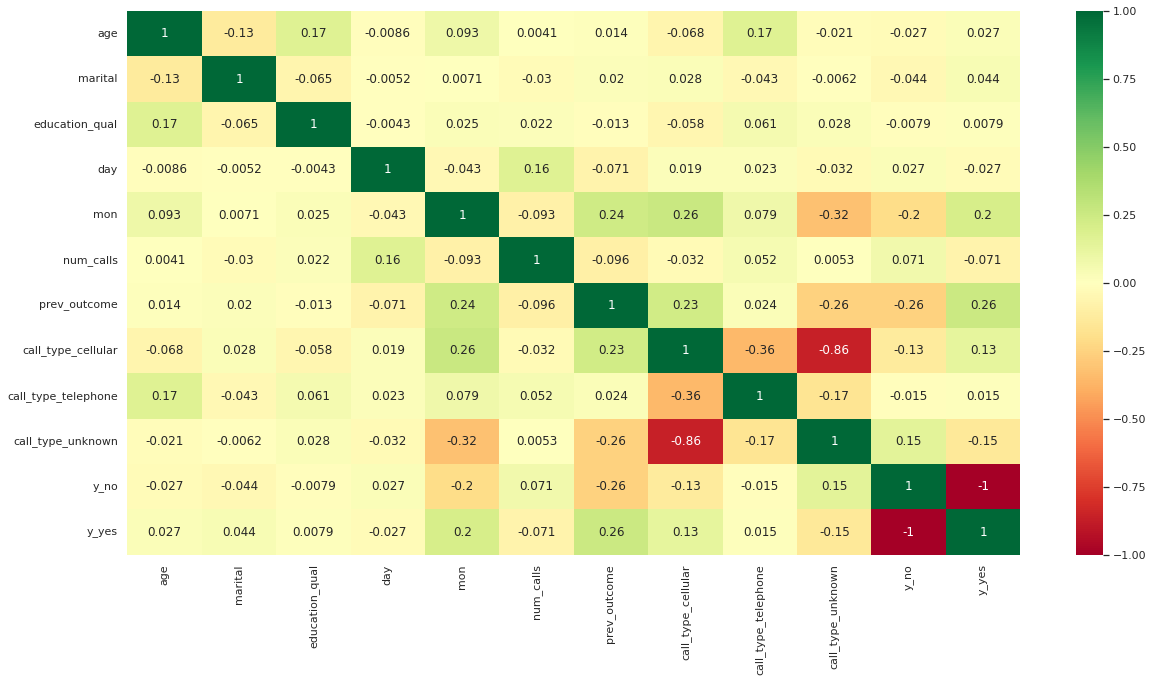

In [ ]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = A_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [ ]:
# creating a function to detect the presence of features in our training set where the features are highly correlated
def correlation(dataset,threshold):
  correlated_features = set()
  cor_matrix = dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_name = cor_matrix.columns[i]
        correlated_features.add(col_name)
  return correlated_features


In [ ]:
corr_cols = correlation(A_train,0.8)

In [ ]:
print(corr_cols)

{'y_yes', 'call_type_unknown'}


now drop the highly correlated cols from the data

In [ ]:
new_A_train = A_train.drop(corr_cols,axis=1)
new_A_test = A_test.drop(corr_cols,axis=1)

In [ ]:
train = pd.concat([new_A_train,B_train],axis=1)
test = pd.concat([new_A_test,B_test],axis=1)

In [ ]:
train.shape, test.shape

((36164, 11), (9041, 11))

In [ ]:
new_df = pd.concat([train,test],axis=0)

In [ ]:
new_df.shape

(45205, 11)

<AxesSubplot:>

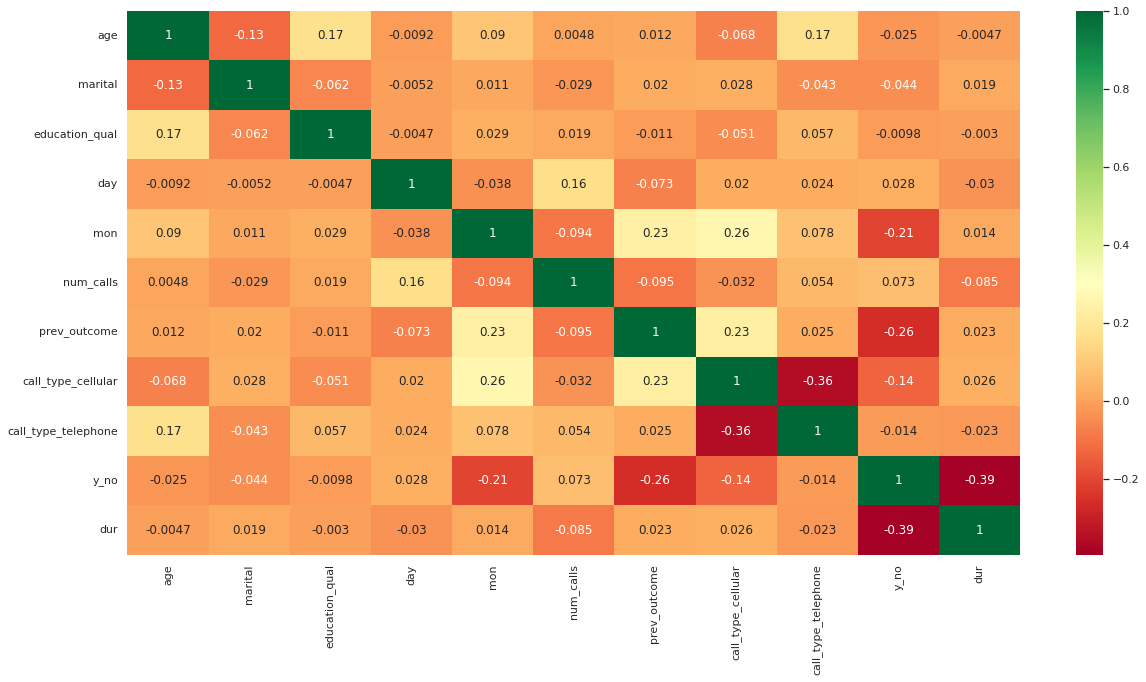

In [ ]:
# checking correlation of variables with the target variable
new_corr_matrix = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(new_corr_matrix,annot=True,cmap='RdYlGn')

In [ ]:
# creating a dataframe to know the correlations of the all the input variables with the target variable "dur" here
target_corr = pd.DataFrame(new_df[new_df.columns[:]].corr()['dur'][:]).T
target_corr

,age,marital,education_qual,day,mon,num_calls,prev_outcome,call_type_cellular,call_type_telephone,y_no,dur
dur,-0.004698,0.018822,-0.003024,-0.030246,0.014082,-0.084582,0.023161,0.025528,-0.023222,-0.394506,1.0


From the above "target_corr" dataframe you can get an idea about all the positive and negative correlations regaring the target column and other input cols.

In [ ]:
# again splitting the data into input and output dataframes
A,B = split(new_df)

In [ ]:
# further splitting the data into training and testing parts
A_train, A_test, B_train, B_test = train_test_split(A,B,test_size=0.2,random_state=42)

In [ ]:
A_train.shape,A_test.shape

((36164, 10), (9041, 10))

# Building Machine Learning Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

### 1.Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression #import
linear_model=LinearRegression(fit_intercept=True) #initialise
linear_model.fit(A_train,B_train) #fit - all magic 
linear_model.predict(A_test)     #predict


array([246.78953229, 194.04900437, 223.6664568 , ..., 579.4490843 ,
        92.63030065, 222.81747601])

In [ ]:
cross_val_linear_model=cross_val_score(linear_model,A_train,B_train,cv=10).mean()
cross_val_linear_model

0.16965649177742262

### 2. K Nearest Neighbor Regression

Choosing the best K(neighbor) Value

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(A_train)
A_train_scaled = scaler.transform(A_train)
A_test_scaled = scaler.transform(A_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(A_train_scaled,B_train)
  print("K value : ", k, " train score : ", knn_regressor.score(A_train_scaled,B_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,A_train,B_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,A_train_scaled,B_train,cv = 10).mean())

K value :  1  train score :  0.831446673458229 cross_val_score :  -0.6337256075008563
K value :  2  train score :  0.5941865316085903 cross_val_score :  -0.2947067373649249
K value :  3  train score :  0.4977889013459589 cross_val_score :  -0.16922062156591156
K value :  4  train score :  0.43688073112711856 cross_val_score :  -0.10894008712562953
K value :  5  train score :  0.4013800273554181 cross_val_score :  -0.07539119265673866
K value :  6  train score :  0.3776949377009545 cross_val_score :  -0.0541564624484532
K value :  7  train score :  0.3564460789396008 cross_val_score :  -0.04056965759561328
K value :  8  train score :  0.34087271616938486 cross_val_score :  -0.026381727871934157
K value :  9  train score :  0.3286394572462439 cross_val_score :  -0.020462392810741758
K value :  10  train score :  0.320967521787059 cross_val_score :  -0.013387333384071188
K value :  11  train score :  0.3134867521167378 cross_val_score :  -0.007856031340015567
K value :  12  train score : 

In [ ]:
cross_val_knn_regressor=max(cross_val_knn)

In [ ]:
print("The best K-Value Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 11 and Cross_val_score is 0.20883281606405685


## Implementing K Nearest Neighbor Regression

In [ ]:
knn_regressor=KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(A_train,B_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
cross_val_knn_regressor=cross_val_score(knn_regressor,A_train,B_train,cv=15).mean()
cross_val_knn_regressor

-0.004786130931019658

# 12.3 Decision Tree Regression

### 12.3.1 Choosing the best of depth Value

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(A_train,B_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(A_train,B_train), "cross_val_score : ", cross_val_score(dt_regressor,A_train,B_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,A_train,B_train,cv = 15).mean())



Depth :  1  train Score  :  0.1562047122637158 cross_val_score :  0.15521961283922375
Depth :  2  train Score  :  0.18052474532815732 cross_val_score :  0.1772613059305734
Depth :  3  train Score  :  0.20133275967669373 cross_val_score :  0.19433416868332995
Depth :  4  train Score  :  0.2116838857980795 cross_val_score :  0.20209997739089475
Depth :  5  train Score  :  0.2237719889091493 cross_val_score :  0.20842727437693825
Depth :  6  train Score  :  0.24052759469390927 cross_val_score :  0.20965666202399014
Depth :  7  train Score  :  0.25881010115687797 cross_val_score :  0.2110851903200247
Depth :  8  train Score  :  0.27697870907870015 cross_val_score :  0.19747587747513254
Depth :  9  train Score  :  0.3012748588847788 cross_val_score :  0.18024331175108257
Depth :  10  train Score  :  0.3279651531069072 cross_val_score :  0.1559575955606215
Depth :  11  train Score  :  0.36134448005805975 cross_val_score :  0.13416278537424428
Depth :  12  train Score  :  0.3952641629158258 c

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)

In [ ]:
print("The best depth Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.2110851903200247


## 12.3.2 Implementing Decision Tree Regression

In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=3, random_state=0)
dt_regressor.fit(A_train,B_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,A_train,B_train,cv=15).mean()
cross_val_dt_regressor

0.19433416868332995

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, new_df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
9,0.775853,y_no
4,0.099932,mon
6,0.087257,prev_outcome
5,0.033508,num_calls
8,0.003451,call_type_telephone
0,0.000000,age
1,0.000000,marital
2,0.000000,education_qual
3,0.000000,day
7,0.000000,call_type_cellular


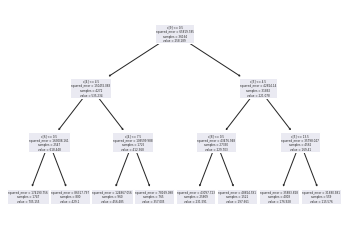

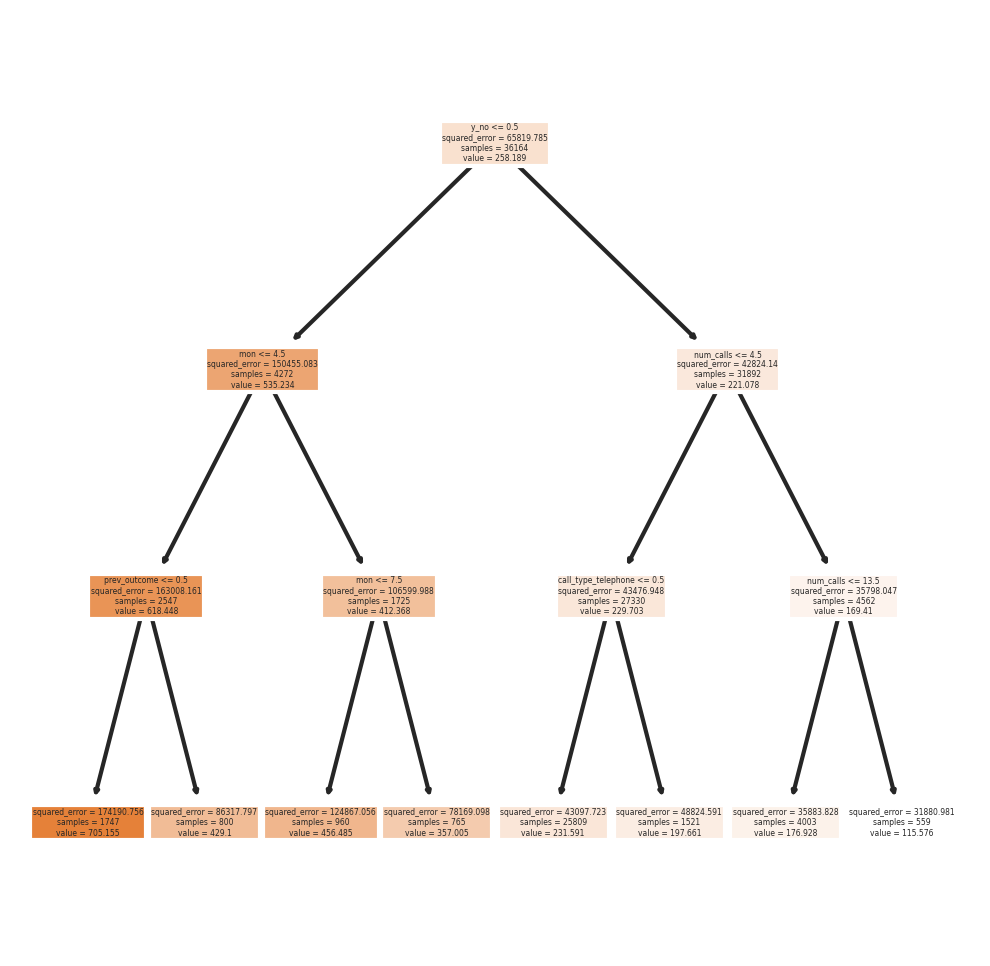

In [ ]:
from sklearn import tree
tree.plot_tree(dt_regressor) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_regressor,
               feature_names = new_df.columns[:-1],
               filled = True);
fig.savefig('imagename.png')

# 12.4 Random Forest Regression

### 12.4.1 Choosing the best depth value

In [ ]:
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(A_train,B_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,A_train,B_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,A_train,B_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.15520126508507223
Depth :  2 cross_val_score :  0.18493559937128803
Depth :  3 cross_val_score :  0.20181298622743457
Depth :  4 cross_val_score :  0.21121038523695126
Depth :  5 cross_val_score :  0.22136012092575838
Depth :  6 cross_val_score :  0.23002077644097935
Depth :  7 cross_val_score :  0.23667483262770306
Depth :  8 cross_val_score :  0.24108151943822317
Depth :  9 cross_val_score :  0.24320262799410491
Depth :  10 cross_val_score :  0.2425761416121648
Depth :  11 cross_val_score :  0.24038598185894042
Depth :  12 cross_val_score :  0.23695706106182596
Depth :  13 cross_val_score :  0.23178056742938327
Depth :  14 cross_val_score :  0.22630794345207655
Depth :  15 cross_val_score :  0.21802501876053482
Depth :  16 cross_val_score :  0.20846410099548832
Depth :  17 cross_val_score :  0.19977555586011744
Depth :  18 cross_val_score :  0.18905778086638966
Depth :  19 cross_val_score :  0.1766506805373795


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best depth Cross_val_score is:",cross_val_rf_regressor)

The best depth is 17 and Cross_val_score is: 0.24320262799410491


## 12.4.2 Implementing Random Forest Regression

In [ ]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(A_train,B_train)


RandomForestRegressor(max_depth=18, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,A_train,B_train,cv=15).mean()
cross_val_rf_regressor

0.18905778086638966

## 12.5 Gradient Boosting Regression

### 12.5.1 Choosing the best Learning Rate

In [ ]:
cross_val_gb=[]
for lr in [0.01,0.05,0.1,0.2,0.3,0.35,0.4,0.5,0.8,1]:
  gb_regressor= GradientBoostingRegressor(learning_rate=lr)
  gb_regressor.fit(A_train, B_train)
  print("Learning rate : ", lr, "cross_val_score : ", cross_val_score(gb_regressor,A_train,B_train,cv = 15).mean())
  cross_val_gb.append(cross_val_score(gb_regressor,A_train,B_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score :  0.17524659058382466
Learning rate :  0.05 cross_val_score :  0.2205870550744443
Learning rate :  0.1 cross_val_score :  0.22536100694485114
Learning rate :  0.2 cross_val_score :  0.23013940663019283
Learning rate :  0.3 cross_val_score :  0.23178122855082903
Learning rate :  0.35 cross_val_score :  0.2307963055020594
Learning rate :  0.4 cross_val_score :  0.2330199793785919
Learning rate :  0.5 cross_val_score :  0.2303714604974031
Learning rate :  0.8 cross_val_score :  0.2251073433495861
Learning rate :  1 cross_val_score :  0.21764108481637298


In [ ]:
cross_val_gb_regressor=max(cross_val_gb)

In [ ]:
print("The best Learning rate Cross_val_score is:",cross_val_gb_regressor)

The best Learning rate is 0.3 and Cross_val_score is: 0.23305061730231635


## 12.5.2 Implementing Gradient Boosting Regression

In [ ]:
gb_regressor= GradientBoostingRegressor(learning_rate=0.35)
gb_regressor.fit(A_train, B_train)

GradientBoostingRegressor(learning_rate=0.35)

In [ ]:
cross_val_gb_regressor=cross_val_score(gb_regressor,A_train,B_train,cv=15).mean()
cross_val_gb_regressor

0.23042213060358477

## 12.6 Extreme Gradient Boosting Regression

### 12.6.1 Choosing the best Learning Rate

In [ ]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(A_train,B_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,A_train,B_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,A_train,B_train,cv = 15).mean())

In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [ ]:
print("The best Learning rate  Cross_val_score is:",cross_val_xgb_regressor)

## 12.6.2 Implementing Extreme Gradient Boosting Regression

In [ ]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
  xgb_regressor.fit(A_train,B_train) #train the model

In [ ]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,A_train,B_train,cv=15).mean()
cross_val_xgb_regressor

## 12.7 Cross-Validation Score for Machine-Learning Models

In [ ]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Gradient Boosting Regression Model: ",cross_val_gb_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

## 12.8 R2 Score for Machine-Learning Models

In [ ]:
B_pred_lr=linear_model.predict(A_test)
B_pred_knn=knn_regressor.predict(A_test)
B_pred_dt= dt_regressor.predict(A_test)
B_pred_rf=rf_regressor.predict(A_test)
B_pred_gb=gb_regressor.predict(A_test)
B_pred_xgb=xgb_regressor.predict(A_test)

In [ ]:
R2_score_lr=r2_score(B_test,B_pred_lr)
R2_score_knn=r2_score(B_test,B_pred_knn)
R2_score_dt=r2_score(B_test,B_pred_dt)
R2_score_rf=r2_score(B_test,B_pred_rf)
R2_score_gb=r2_score(B_test,B_pred_gb)
R2_score_xgb=r2_score(B_test,B_pred_xgb)

In [ ]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Gradient Boosting Regression Model: ",R2_score_gb)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

### 13. Suggestion to insurance company & customer :-Solving problem statements based on Feature Importance

In [ ]:
rf_regressor.feature_importances_

In [ ]:
df.columns

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xgb_regressor.feature_importances_

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()